<a href="https://colab.research.google.com/github/nickv779/LADS-Notebooks/blob/main/Nicolas_Valiente_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4 (The Big One)
> With improvements by Gavin Sidhu (Fall 2023)
# Lin. Alg. for Data Science.
# Due date: hopefully a reasonable one, see discord/canvas

# Collaboration rules:
> For this task, I'd prefer if you worked on your own. But **if you run into time-consuming technical difficulties** (with Python, numpy, matplotlib) -- feel free to ask for help on discord. Just don't post your code so that you don't spoil anything (especially conceptual).

> There are two parts which you can freely discuss on Discord and share code (finding nearest vectors and plotting tiny images).

> You can also reuse code from our past notebooks, and check documentation for the libraries, python etc. However, all new code ought to be conceptualized and written by you. In particular, using LLMs to solve any part of the assignment is *not* considered fair game.

# Instructions:
0. Solve the tasks (by writing Python code).
1. Prefix the name of the notebook with your name (e.g. Who_Ever_HW4.ipynb)
2. Run all the cells in the notebook, so that all results are visible.

3. Important: on colab create a shared link using the option **"for anyone with the link"** and switch permission from **Viewer** to **Editor**, so that it says "Anyone on the internet with the link can edit".

4. Submit the above link on canvas before the deadline. Do not modify the notebook after that.

5. The day after the final deadline, **you will be required to answer** some brief questions about your solution via a google form I will send you. This is part of the homework assignment!

> This time I will also ask you to copy-paste some of your answers below from this notebook to the form. I know it's annoying, but it'll speed up the grading.





# Instruction details (READ!)
- **You are encouraged to** use the code from our previous notebooks (but do make an effort to understand what is does, don't just copy-paste blindly)

- **You MUST NOT** use any language and library elements that were not covered in class colabs. If you feel you absolutely must use something else, contact me.

> Rationale: First, while class attendence is not mandatory, I want you to be familiar with class notebooks. Second, this requirement simulates a situation in which you need to get proficient with in-house software tools developed by your company. Also, this should discourage *some* of you from blindly using LLMs, which unfortunately has been happenning. (Most of you don't do this so it's annoying -- but I suppose you don't necessarily want to share your hard-earned A with someone who just chatGPT-ed their way through their education...)

- Tasks (**marked T:**) require you to do some coding (usually in the code cell directly below).

- Questions (**marked Q:**) require you to briefly answer some questions in text. Make sure the answers highlight your understanding of the: mathematics, algorithms, important insights from data visualizations etc.

For clarity, **please answer each question like this** directly below the question (and not as a comment in the code.):

> **A**:


# Overview

The **objective** of this notebook is to **explore and analyze** a realistic image dataset called cifar100, which contains 60,000 color images.

Due to the dataset's size, manually examining each image is impractical. Instead, we will use t-SNE and kMeans and also investigate nearest neighbors using the Euclidean metric.

Previously, our focus was mostly on MNIST, which contains real data but is heavily preprocessed and idealized for our use. Now, our goals are to:

- Evaluate the performance of t-SNE, kMeans, and kNN when applied to more realistic images
- Identify patterns in the images, their tSNE embeddings and k-means clusters and nearest neighbours -- and explain why they occur.
- Recognize the limitations of these methods.

Our main operations will involve working with high-dimensional vectors, norms, distances, sums, and means.

There will be four main parts in this notebook:

1. Loading the data and checking its format is correct for our use
2. Preparing a function for identifying nearest neighbors
3. Conducting exploratory data analysis with t-SNE (with an extra step using nearest neighbor search)
4. Performing data analysis by clustering with kMeans (using insights from the previous part)

There is also be a bonus section where you can upload your own image and look at similar images! And another one in which you can play with another, newer method instead of tSNE.


# Guidelines
- Follow the assigned tasks in a reasonable manner
- Note that this is one big assignment focusing on data analysis, not many isolated tasks.
- You will likely need to do several iterations on this assignment. It's a good idea to start from a reasonably small subset of the data just to make sure everything works.
- Provide brief yet informative answers to the questions. Elaborate when necessary, but be concise.
- Make sure your plots, visualizations, and other outputs are clean and informative.

- This is a large assignment focusing on data analysis. The point below are important, but not as crucial:
    * Writing efficient code (although it might test your patience if it's too slow)
    * Ensuring code readability (it will make life easier, though)
    * Including comments (but they might help when you have to fill out the form)

- Do consider defining functions for repetitive tasks, like finding nearest neighbors

- Do make sure you use the appropriate tool for each task -- and that your use it correctly.

**Note:** This is a substantial assignment, and while coding details won't be nitpicked at during grading, prioritizing clarity where possible will *probably* enhance your overall experience. Same for efficiency.

**Another note:** I use the term plot loosly. It can mean plt.plot, scatter, imshow etc.



# Imports

**T:** Import the things you need -- and nothing else!

> Hopefully this will make sure that you didn't just copy-paste all the imports from all my previous notebooks.

In [1]:
from keras.datasets import cifar100 # this will get you the data!

# add all other needed imports and not unnecessary ones
import numpy as np
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

2025-10-31 16:53:28.194621: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-31 16:53:28.227428: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-31 16:53:29.043516: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


# The data

> CIFAR-100 is another classical image dataset. We have experience with using MNIST, and the format will be quite similar. Each image is 32x32, with 3 color values (R,G,B) for each pixel ranging from 0-255.

## Load the data (like we did with MNIST)

> Recall that mnist.load_data() returned two pairs:
(train_images, train_labels), (test_images, test_labels).
 We will mostly use train_images, and train_labels at one occasion. It works similarly for the CIFAR-100 dataset imported above.

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


> To avoid problems later, ensure they are float values between 0 and 1.
 Be sure to not re-run the code for doing this without first re-initializing the data using the above code, otherwise you may accidentally scale the data down even further.

> Double check the shape of the arrays you loaded. Also ensure you have normalized the R,G,B values to between 0 and 1.

In [3]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
train_images_normalized = train_images / 255.0
train_labels_normalized = train_labels / 255.0
test_images_normalized = test_images / 255.0
test_labels_normalized = test_labels / 255.0

> Plot the image with the index defined below. Hint: use plt.imshow and not plt.plot!

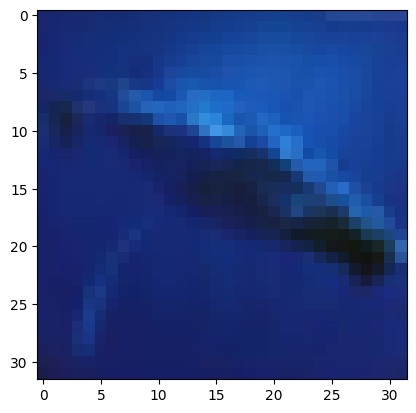

In [5]:
ind = 4311
plt.imshow(train_images_normalized[ind])

## Channels of an RGB image

> An image has 3 channels corresponding to R,G,B.

**T:** Plot each channel (of the image you plotted) separately using plt.imshow. Then look at the 3 plots. Which channel (R,G,B) contributes the most (has highest intensity values)?

> Hint: You'll likely use a syntax similar to how we selected the columns of a 2D array.

**Q:** Is the result consistent with your expectation based on eyeballing the original image?

> **Answer**: Definitely not, I assumed I would have seen more prominent red in what should be the red channel, but suffice to say I can't notice even a speck of red and mostly just hints of blue and green with the closest to red being yellow.

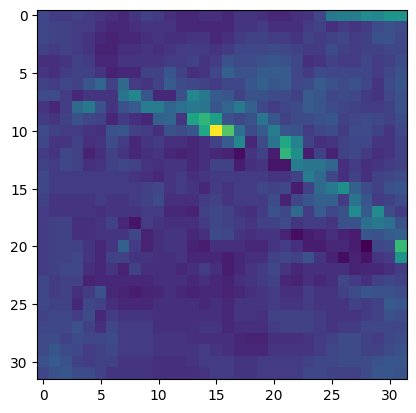

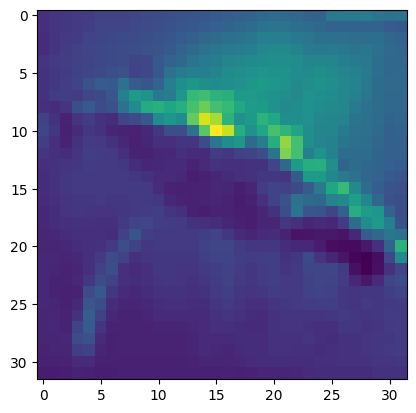

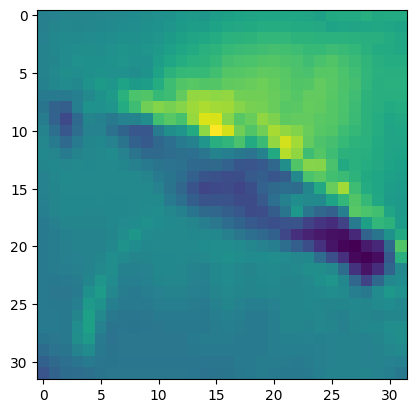

In [6]:
for i in range(3):
    plt.imshow(train_images_normalized[ind][:,:,i])
    plt.show()

# Closest images

> Recall that we can think about an image as a vector in a high-dimensional vector space, $\mathbb{R}^d$.

**T:** Write a **Python function** which returns the $k$ nearest vectors (or in this case, the $k$ nearest images) using the Euclidean distance.

> Tip: Try to use np.argsort for efficient sorting -- it's very useful whenever we talk about finding k nearest vectors. It may be convenient to have one function returning the indices, and another returning the actual images (perhaps using the previous function).

> If you get stuck here, search the colabs and feel free to ask for help on Discord -- that's okay, it's not the point of this assignment.

**T:** Test this function briefly, so that you're sure it works.

> Simple unit tests with asserts are enough.

**T:** Compute and plot a bunch of images closest to the above image. For clarity, plot the images in a horizontal row.

> As a gesture of good faith, below is a helpful function I wrote *especially* for you!



In [7]:
def plot_images_in_a_row(ims):
  'Takes a list/array of images and plots them spaced horizontally.'
  _, axs = plt.subplots(1, len(ims), figsize = (20,5))
  for im, ax in zip(ims, axs.ravel()):
    ax.imshow(im)
    ax.axis('off')

In [36]:
target.reshape(1, -1, 3).shape

(1, 1024, 3)

In [40]:
target = train_images_normalized[ind]
distances = np.linalg.norm(train_images_normalized.reshape(50000, -1, 3) - target.reshape(1, -1, 3), axis=(1,2))

In [63]:
k = 10
k_nearest = train_images_normalized[np.argsort(distances)][1:k+1]

In [51]:
k_nearest.shape

(10, 32, 32, 3)

In [43]:
distances

array([25.97244836, 35.12844646, 29.19208548, ..., 18.38612468,
       17.62851095, 10.81740165], shape=(50000,))

In [73]:
def k_nearest_vectors(images, target, k):
    '''
    Retrieve the k-nearest images of the target by Euclidean distance

    Args:
        images: numpy array of image data in the shape (N, W, H, 3)
        target: index of image from images to calculate nearest neighbors of
        k: the number of nearest neighbors to return
    Returns:
        numpy array of the k-nearest neighbors of the target image from images, excluding the image itself
    '''
    
    N = images.shape[0]

    # reshape image data to combine WxH into one value
    target_image = images[target].reshape(1, -1, 3)
    images_reshaped = images.reshape(N, -1, 3)
    image_distances = np.linalg.norm(images_reshaped - target_image, axis=(1,2))

    # return starting from 1 to ignore target image
    return images[np.argsort(image_distances)][1:k+1]

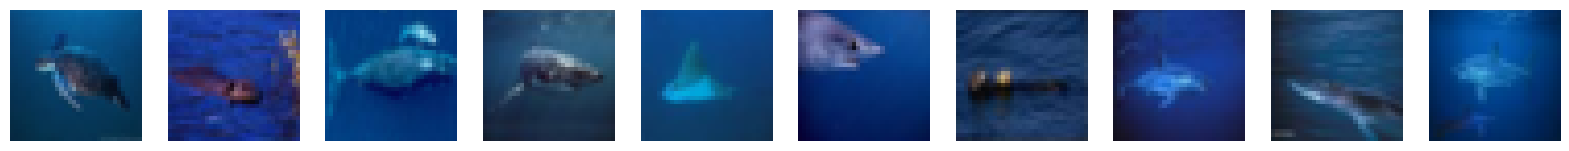

In [76]:
plot_images_in_a_row(test)

In [75]:
test = k_nearest_vectors(train_images_normalized, ind, 10)

# Exploring the data with t-SNE


**T:** Set up t-SNE with appropriate parameters.

> Tip: Use the "random_state" parameter in the TSNE function to ensure you get the same results if you have to re-run the notebook!

**T:** Make sure there are *no warnings* printed (you may need to set some additional parameters).

In [ ]:
# Your code here

**T:** Fit the model with your data and retreive the result. (Remember that t-SNE doesn't know -- or care -- about 2D images)

> Hint: You may need to limit the amount of data, since t-SNE tends to be slow. You could even work with a small subset and increase it to a larger subset for the final result. Try to be smart about it, otherwise you'll wait forever for t-SNE to finish!

> Fun fact: Even disregarding the dimension of the space, performing t-SNE on $n$ data points has a time complexity of $\Omega(n^2)$, so you can see why starting with a small subset may be a good idea!

> Overall, you may lose a lot of time if you recompute all the notebook on too large data. You may start small and quick, and rerun on larger data once things work.

## Plotting t-SNE embedding

**T:** Scatter-plot the output of t-SNE.

**Q:** Can you see any significant structure? Maybe some groups? If so where are they on the plot.



In [ ]:
# Your code here

**T:** Now scatterplot the output, but assigning a color (can be random)
depending on the label (remember y_train!). We want any images with the same label to be the same color.

**Q:** How well does the structure reflect the labels? Are the labels clustered or not? Mention some example labels, their colors and their coordinates range on the plot.

In [ ]:
# Your code here

In [ ]:
np.random.seed(0) # to fix the random colors
# Your code here

## Plotting the images in t-SNE embedding space

**T:** Plot the t-SNE output again --
but now plot the original images at locations given by t-SNE (as we did in class, you can reuse this code!).

> If this gives you problems, ask on Discord. Sometimes it can fail in non-obvious ways, no need to waste time on this.

**Q:** Can you see significant structures now? Any groups of similar images? What specific images can you see, and at what coordinates? In what sense are they 'similar'?

> (Tip: if the generated plot is large, you can click on it and zoom. You can also save the ouput, download the resulting image on your computer
And zoom it more comfortably.)

In [ ]:
# hint: make sure you scatter-plot the points, or the images may
# not show up!

np.random.seed(0)
plt.figure(figsize = (40,40)) # larger figure may be better
# Your code here

## Comparing perplexity values

> As mentioned earlier, the perplexity parameter controls roughly how many neighbours of each vector are taken into account when doing the dimensionality reduction.

**T:** Fit two new t-SNE models on your data using different perplexity values (perhaps one with a lower perplexity than your original model, and one higher?).

**Q:** How did the perplexity parameter affect the structure of the t-SNE output? Mention 3 choices giving vastly different results. Keep the plots.

> Try not to copy paste the code, you can do it in a for loop!


In [ ]:
# Your code here

## Patterns inside groups of images

> There should be groups of 'similar' images, according to some visible **pattern**. For example, you can see:

> - Images with a centered object on a white background
> - Images with the sky in the upper part and distinct objects in the lower part


**Q:** Find at least 5 new **patterns**, and describe them briefly but concretely (make sure to include the coordinates at which they appear)!

## Important question:

**Q**: *Why* do you think t-SNE picks up these patterns? **This is an important question, so be sure to elaborate!** Refer to the patterns you identified. Your answer should highlight your understanding of t-SNE and related concepts.

> For each of the 5 types of **patterns**
you identified, we can select their
representative images using their t-SNE coordinates.

> Tip: suppose someone would like to perform such a query many, many times. Can you make it efficient for them? Do it in the code.

> For example: in my case "the things on a white background",
had t-SNE coordinates close to $(-15,-15)$, so I found 10 images with t-SNE
coordinates closest to $(-15,-15)$. I then plotted them in one row.

**T:** Do the above for your five selected types of **patterns**.

**Q:** Did you get similar images? Mention similarities and differences you see, be specific.


In [ ]:
# Your code here

## Back to the high-dimensional space!

> Let's try a similar thing in the original, high-dimensional space.

**T:** Pick a representative image for each of the 5 **patterns**, and find 10 images which are closest *in the original high-dimensional space*. Plot them (in horizontal rows).

## Important question:

**Q**: The results are most likely **not** the same as previously. Do you understand why? **This is really important, elaborate!** Make sure it's clear you know what's happening here.

In [ ]:
# Your code here

# Clustering with k-Means

> We can use the insights obtained from the 'exploratory data analysis' performed in the previous part, to preform our data analysis in a reasonable way. In particular, it should give us a hint about a reasonable number of clusters to use.




**Q:** Based on the last part, how many clusters do you think is good for kMeans? Why? Be specific.

**T:** Set up KMeans with some rasonable $k$ based on the previous part (no worries: there is no single best answer).

> Tip: to speed things up, import and use **MiniBatchKMeans** instead of KMeans. Browse the documentation to know how it differs. We did not cover this in class, but you can use it.

> In short: MiniBatchKMeans is less accurate, faster, good enough here, and you use it the same way. You don't have to use it -- but not using it will cost you more time and you will lose some credit. So, you know, just use it.

In [ ]:
# Your code here

**T:** Fit kMeans with your data.

In [ ]:
# Your code here

## Plot t-SNE embedding using clusters' labels

> Let's see to what extent the kMeans clusters
resemble the structure of the t-SNE output.

**T:** Plot the t-SNE embedding again -- but this time assign
colors corresponding to the kMeans cluster of each image.

**Q:** Can you see significant groups of points with the same color (label)? (If not, something is wrong.) How many do you see, roughly? Describe them, mention the rough position (x,y) and some characteristic features for some of them.


In [ ]:
# Your code here

**T:** Repeat the plot above but **define the color of each point as the (approximate) mean color of
the images in the cluster** to which the image belongs to.

> Hint: try to find a simple way of getting these colors.

> You should see some blue and orange parts. Also some almost white and quite dark parts? If yes -- good. **When in doubt, it's okay to post this particular image on discord and ask!**

> If you don't see them -- something is likely wrong. Maybe too few iterations? If everything is gray, something is very  wrong -- maybe way too few clusters (k). Tune the parameters until happy. Do you see why we wanted to use the faster, approximate version of k-means? Data analysis is often done iteratively/interactively -- so efficient algorithms save your time.

**Q**: Describe 5 features you see on the plot, along with their tSNE coordinates.

In [ ]:
# Your code here

## On the entire dataset

> If you're not satisfied with the quality, you can tune the parameters some more.

**T:** If everything looks acceptable, rerun the analysis on the full dataset.

In [ ]:
# Your code here

> Let's verify if the clusters we got on the entire dataset are reasonable.

**T:** For each cluster center, plot, say, 10 images which are closest in the sense of the Euclidean metric to it. Also plot the cluster center!

**Q:** Looks good? Or maybe you see something suspicious? Describe some examples.

> For example: if any cluster center look like a single image in the dataset, you likely chose too many clusters!

In [ ]:
# Your code here

# Bonus \#1 [some extra credit]:

Try your own image! Does it belong to a cluster you'd expect? What do you see?

In [ ]:
from google.colab import files
from PIL import Image

def get_uploaded_image(size = (32,32)):
  '''Lets you download and image.
  Returns an np.array representing the downloaded image.
  The image is resized to the provided size.
  '''
  filename = list(files.upload())[-1]
  im = Image.open(filename).resize(size)
  npim = np.array(im)[..., :3].astype(float)
  if npim.max() > 2:
    npim /= 255.
  return npim

In [ ]:
# your_image = get_uploaded_image() # uncomment and run to download an image
#plt.imshow(your_image)

**T:** Plot the 'most similar' images to the cluster closest to the image. (Hint: You can do this on your own, but Kmeans has a function called 'predict' which returns the index of the closest cluster center.)

**T:** Plot the 'most similar' images to your image.

**Q:** Is there any advantage to finding the 'most similar' images via the clusters? What are the benefits? What do we lose? How is this tradeoff affected by the number of clusters? Please elaborate!

> (Answer)


In [ ]:
# Your code here

# Bonus \#2 [more extra credit]



> We have been working with t-SNE to lower the dimensions of our data, but now I want to briefly introduce you to another, newer technique called UMAP (Uniform Manifold Approximation and Projection). While t-SNE emphasizes local relationships, UMAP tries to preserve both local and global structures.

**T:** Below is code to import the package for UMAP. Research the documentation and fit UMAP to your same data as before. The syntax should be fairly similar. Then plot the two scatterplots containing the colored labels and the images themselves.

**Q:** During your research, you may have come across documentation for UMAP's parameters (if you didn't, go back and look!). Briefly explain the two important parameters (they're both numeric).

In [ ]:
!pip install umap-learn

In [ ]:
import umap